In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
def load_data(folder_healthy, folder_unhealthy, img_size=(128, 128)):
    data, labels = [], []
    
    # Load healthy images
    for img_name in os.listdir(folder_healthy):
        img_path = os.path.join(folder_healthy, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size) / 255.0
        data.append(img.flatten())  # Flatten the image
        labels.append(0)  # 0 = Healthy
    
    # Load unhealthy images
    for img_name in os.listdir(folder_unhealthy):
        img_path = os.path.join(folder_unhealthy, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size) / 255.0
        data.append(img.flatten())  # Flatten the image
        labels.append(1)  # 1 = Unhealthy
    
    return np.array(data), np.array(labels)

# Paths
folder_healthy = r"D:\AI Algorithm\cucumber\healthy"
folder_unhealthy = r"D:\AI Algorithm\cucumber\unhealthy"

# Load data
X, y = load_data(folder_healthy, folder_unhealthy)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize k-NN with k=5
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [6]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
)
from math import sqrt
import numpy as np

# Predict the labels
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Get probabilities for AUC

# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mean Bias Deviation (MBD)
mbd = np.mean(y_test - y_pred)

# Print all metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nRegression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")


Evaluation Metrics:
Accuracy: 0.7186
Precision: 0.9800
Recall: 0.6087
F1-Score: 0.7510
AUC: 0.8956

Confusion Matrix:
[[68  2]
 [63 98]]

Regression Metrics:
Mean Absolute Error (MAE): 0.2814
Mean Squared Error (MSE): 0.2814
Root Mean Squared Error (RMSE): 0.5305
Explained Variance Score: -0.0021
R² Score: -0.3323
Mean Bias Deviation (MBD): 0.2641


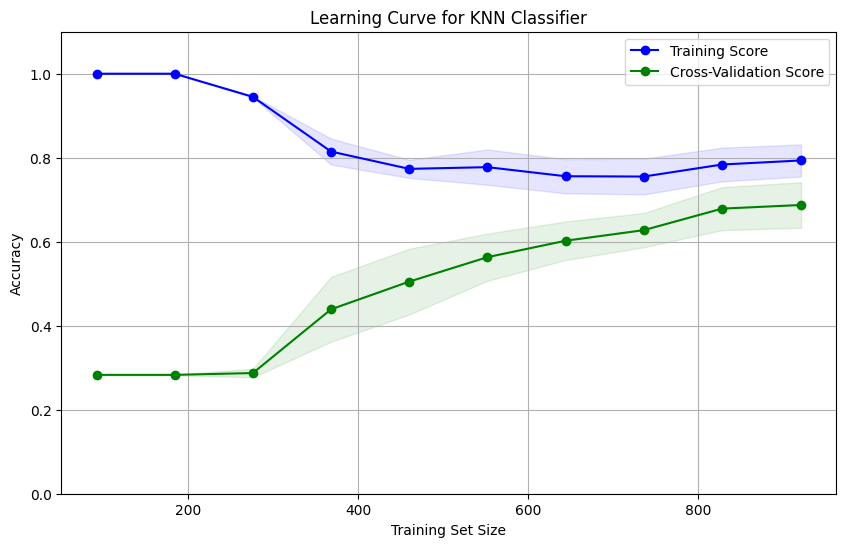

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, accuracy_score

def plot_learning_curve(estimator, X, y, title="Learning Curve (KNN)", cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots a learning curve for the given estimator and dataset.

    Parameters:
    - estimator: The machine learning model (e.g., KNN classifier).
    - X: Feature set.
    - y: Target labels.
    - title: Title of the plot.
    - cv: Number of cross-validation folds.
    - n_jobs: Number of parallel jobs for computation.
    - train_sizes: Array of training set sizes to use for generating the learning curve.
    """
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(accuracy_score)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-Validation Score")
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")
    
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.1)  # Y-axis scaled from 0 to 1
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for the KNN classifier
plot_learning_curve(knn, X, y, title="Learning Curve for KNN Classifier")
